# Практическая работа №6

## Кластеризация
Выполнил: Самарин Никита КИ21-17/2Б

## Цель работы
Знакомство с теоретическими основами кластеризации данных,
формирование навыков решения задачи кластеризации с помощью языка
программирования Python.

## Задачи:
#### Выполнение практической работы предполагает решение следующий задач:
1. Предварительная обработка исходных данных
2. Построение моделей кластеризации данных
3. Подбор оптимальных параметров моделей
4. Оценка качества построенных моделей

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import warnings

from sklearn.cluster import KMeans, Birch
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
import utilities

warnings.filterwarnings("ignore")

In [2]:
clas_cat_attributes = ['Sex', 'HasPartner', 'HasChild', 'HasPhoneService', 'HasMultiplePhoneNumbers', 'HasInternetService', 'HasOnlineSecurityService', 'HasOnlineBackup', 'HasDeviceProtection', 'HasTechSupportAccess', 'HasOnlineTV', 'HasMovieSubscription', 'HasContractPhone', 'IsBillingPaperless', 'PaymentMethod']
clas_num_attributes = ['ClientPeriod', 'MonthlySpending', 'TotalSpent', 'IsSeniorCitizen']
clas_class = 'Churn'

train_clas =  pd.read_csv("train_clas.csv", usecols = clas_cat_attributes + clas_num_attributes + [clas_class])

### Предварительная обработка

In [3]:
train_clas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3169 entries, 0 to 3168
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              3169 non-null   int64  
 1   MonthlySpending           3169 non-null   float64
 2   TotalSpent                3169 non-null   object 
 3   Sex                       3169 non-null   object 
 4   IsSeniorCitizen           3169 non-null   int64  
 5   HasPartner                3169 non-null   object 
 6   HasChild                  3169 non-null   object 
 7   HasPhoneService           3169 non-null   object 
 8   HasMultiplePhoneNumbers   3169 non-null   object 
 9   HasInternetService        3169 non-null   object 
 10  HasOnlineSecurityService  3169 non-null   object 
 11  HasOnlineBackup           3169 non-null   object 
 12  HasDeviceProtection       3169 non-null   object 
 13  HasTechSupportAccess      3169 non-null   object 
 14  HasOnlin

In [4]:
train_clas[clas_num_attributes + [clas_class]] = train_clas[clas_num_attributes + [clas_class]].apply(pd.to_numeric, errors="coerce")

In [5]:
print(train_clas.isnull().sum())

ClientPeriod                0
MonthlySpending             0
TotalSpent                  6
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64


In [6]:
train_clas = train_clas.fillna(train_clas['TotalSpent'].mean())

In [7]:
label_encoder = LabelEncoder()
for column in clas_cat_attributes:
    train_clas[column] = label_encoder.fit_transform(train_clas[column])

In [8]:
train_clas_x = train_clas[clas_cat_attributes + clas_num_attributes]
train_clas_y = train_clas[clas_class]

### Кластеризация

#### Кластеризация КMeans

Метрики оценки кластеризации KMeans с базовым числом кластеров и с числом кластеров подобранным «правилом локтя»
Adjusted Rand Index: -0.0351, -0.0228
Adjusted Mutual Information: 0.0281, 0.0296
Homogeneity: 0.0291, 0.0483
Completeness: 0.0276, 0.0219
V-Measure: 0.0284, 0.0301
Silhouette: 0.6923, 0.6034


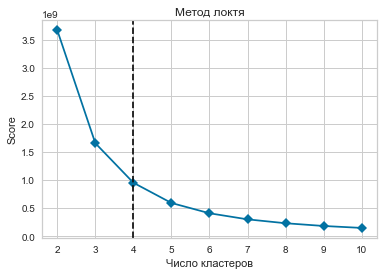

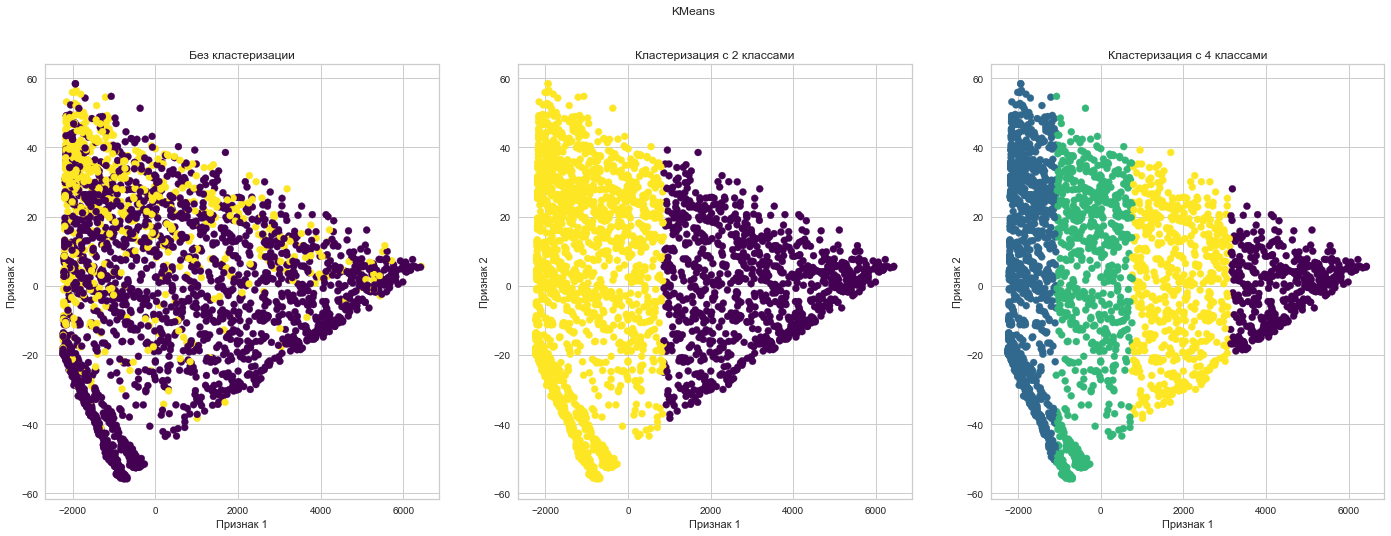

In [9]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(train_clas_x)
base_classes = kmeans.labels_
pca = PCA(n_components=2).fit_transform(train_clas_x)
kelbow_visualizer = KElbowVisualizer(KMeans(), timings=False, param_grid={"n_clusters": range(2, 10)})
kelbow_visualizer.fit(train_clas_x)
elbow_kmeans = KMeans(n_clusters=kelbow_visualizer.elbow_value_)
elbow_kmeans.fit(train_clas_x)
elbow_classes = elbow_kmeans.labels_

utilities.clasterization_plot(pca, train_clas_y, base_classes, elbow_classes, kelbow_visualizer, "KMeans")
utilities.clasterization_metrics(train_clas_x, train_clas_y, base_classes, elbow_classes, "KMeans")

#### Кластеризация Birch

Лучшие параметры {'n_clusters': 2, 'threshold': 0.1, 'branching_factor': 10}
Лучшие параметры {'n_clusters': 5, 'threshold': 0.9, 'branching_factor': 10}
Метрики оценки кластеризации Birch с базовым числом кластеров и с числом кластеров подобранным «правилом локтя»
Adjusted Rand Index: -0.0133, -0.0059
Adjusted Mutual Information: 0.0235, 0.0266
Homogeneity: 0.0255, 0.0489
Completeness: 0.0222, 0.0189
V-Measure: 0.0237, 0.0272
Silhouette: 0.6646, 0.5648


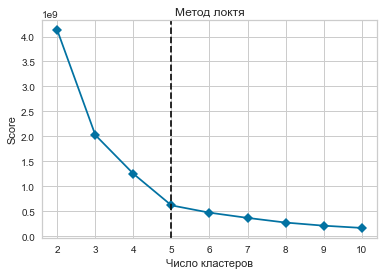

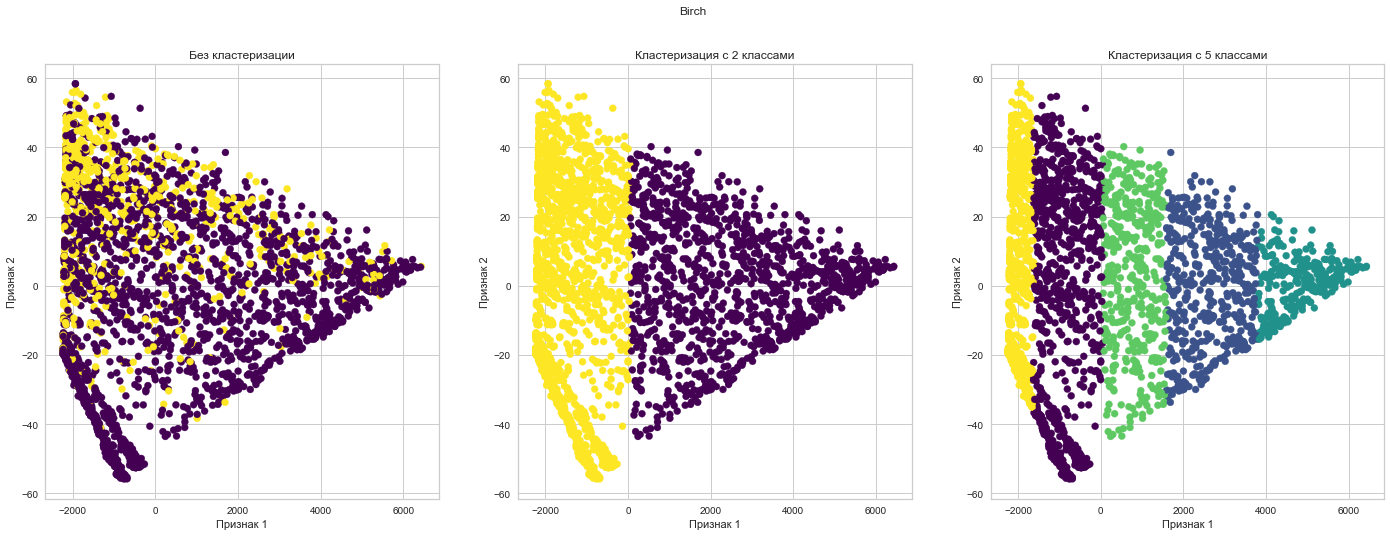

In [10]:
parameters = {'n_clusters': [2],
              'threshold': [0.1, 0.3, 0.5, 0.7, 0.9],
              'branching_factor': [10, 30, 50, 70, 90]
              }
birch = utilities.birch_grid_search(parameters, train_clas_x, train_clas_y)
base_classes = birch.labels_
pca = PCA(n_components=2).fit_transform(train_clas_x)
kelbow_visualizer = KElbowVisualizer(Birch(), timings=False, param_grid={"n_clusters": range(2, 10)})
kelbow_visualizer.fit(train_clas_x)
parameters = {'n_clusters': [kelbow_visualizer.elbow_value_],
              'threshold': [0.1, 0.3, 0.5, 0.7, 0.9],
              'branching_factor': [10, 30, 50, 70, 90]
              }
elbow_birch = utilities.birch_grid_search(parameters, train_clas_x, train_clas_y)
elbow_classes = elbow_birch.labels_

utilities.clasterization_plot(pca, train_clas_y, base_classes, elbow_classes, kelbow_visualizer, "Birch")
utilities.clasterization_metrics(train_clas_x, train_clas_y, base_classes, elbow_classes, "Birch")

In [11]:
from sklearn import datasets
x, y = datasets.load_iris(return_X_y=True)

#### Кластеризация КMeans

Метрики оценки кластеризации KMeans с базовым числом кластеров и с числом кластеров подобранным «правилом локтя»
Adjusted Rand Index: 0.7302, 0.6461
Adjusted Mutual Information: 0.7551, 0.7152
Homogeneity: 0.7515, 0.8052
Completeness: 0.7650, 0.6510
V-Measure: 0.7582, 0.7199
Silhouette: 0.5528, 0.4975


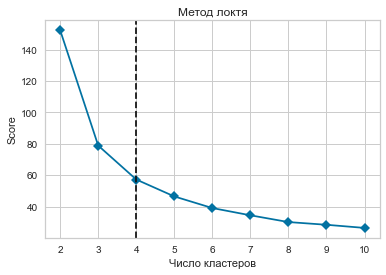

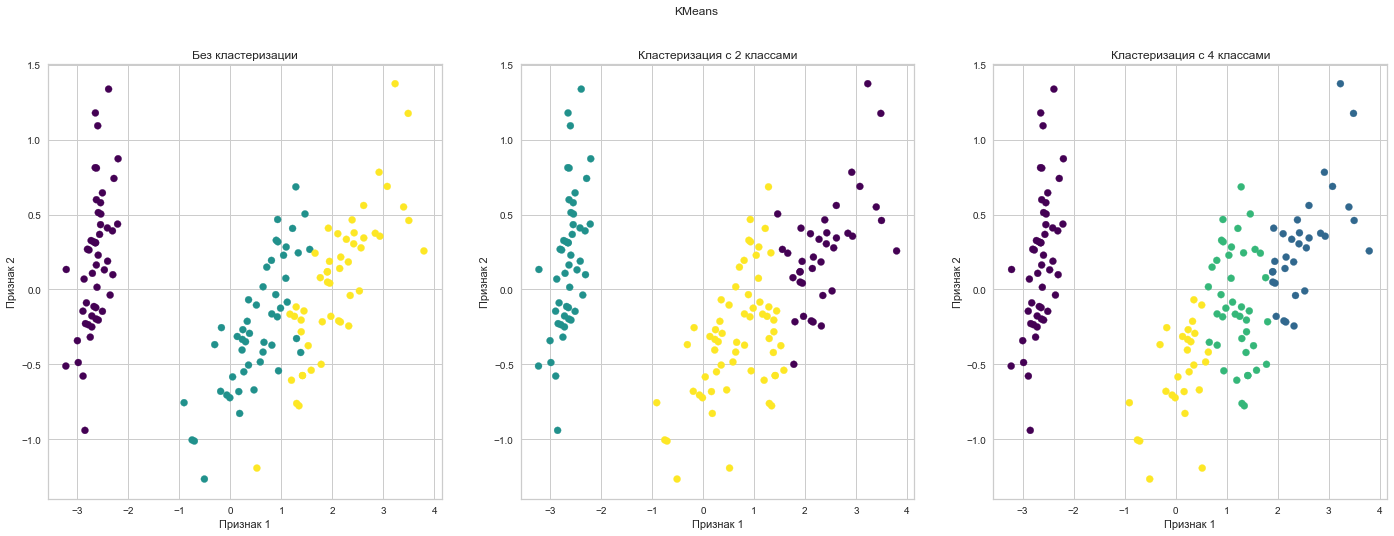

In [12]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(x)
base_classes = kmeans.labels_
pca = PCA(n_components=3).fit_transform(x)
kelbow_visualizer = KElbowVisualizer(KMeans(), timings=False, param_grid={"n_clusters": range(2, 10)})
kelbow_visualizer.fit(x)
elbow_kmeans = KMeans(n_clusters=kelbow_visualizer.elbow_value_)
elbow_kmeans.fit(x)
elbow_classes = elbow_kmeans.labels_

utilities.clasterization_plot(pca, y, base_classes, elbow_classes, kelbow_visualizer, "KMeans")
utilities.clasterization_metrics(x, y, base_classes, elbow_classes, "KMeans")

#### Кластеризация Birch

Лучшие параметры {'n_clusters': 3, 'threshold': 0.1, 'branching_factor': 10}
Лучшие параметры {'n_clusters': 4, 'threshold': 0.1, 'branching_factor': 10}
Метрики оценки кластеризации Birch с базовым числом кластеров и с числом кластеров подобранным «правилом локтя»
Adjusted Rand Index: 0.7455, 0.6934
Adjusted Mutual Information: 0.7954, 0.7407
Homogeneity: 0.7869, 0.8365
Completeness: 0.8094, 0.6716
V-Measure: 0.7980, 0.7450
Silhouette: 0.5553, 0.4794


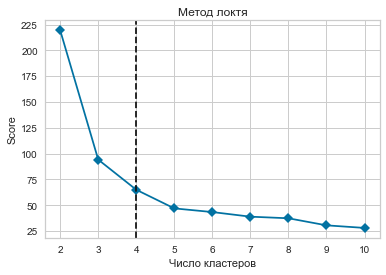

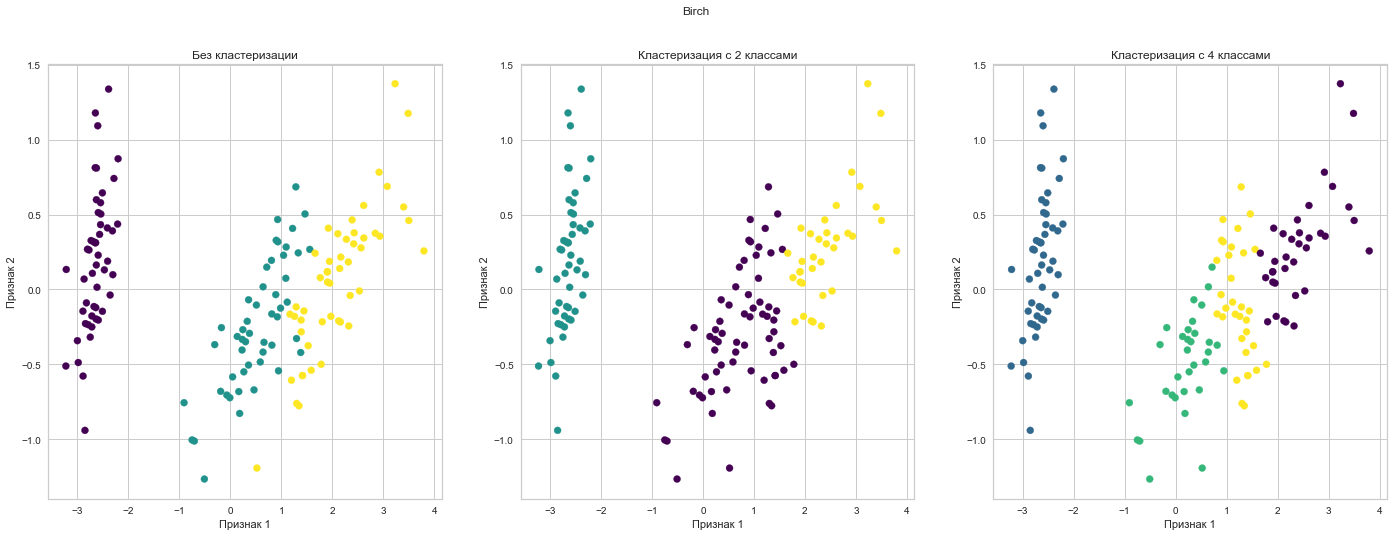

In [13]:
parameters = {'n_clusters': [3],
              'threshold': [0.1, 0.3, 0.5, 0.7, 0.9],
              'branching_factor': [10, 30, 50, 70, 90]
              }
birch = utilities.birch_grid_search(parameters, x, y)
base_classes = birch.labels_
pca = PCA(n_components=3).fit_transform(x)
kelbow_visualizer = KElbowVisualizer(Birch(), timings=False, param_grid={"n_clusters": range(2, 10)})
kelbow_visualizer.fit(x)
parameters = {'n_clusters': [kelbow_visualizer.elbow_value_],
              'threshold': [0.1, 0.3, 0.5, 0.7, 0.9],
              'branching_factor': [10, 30, 50, 70, 90]
              }
elbow_birch = utilities.birch_grid_search(parameters, x, y)
elbow_classes = elbow_birch.labels_

utilities.clasterization_plot(pca, y, base_classes, elbow_classes, kelbow_visualizer, "Birch")
utilities.clasterization_metrics(x, y, base_classes, elbow_classes, "Birch")